In [7]:
9import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\vedant\Downloads\global_student_migration.csv')

In [8]:
df.head()

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


## Global Migration trend from 2019-2023.

In [22]:
df['id']= 1
df_dest=df.groupby('destination_country').agg({'id': 'sum'})


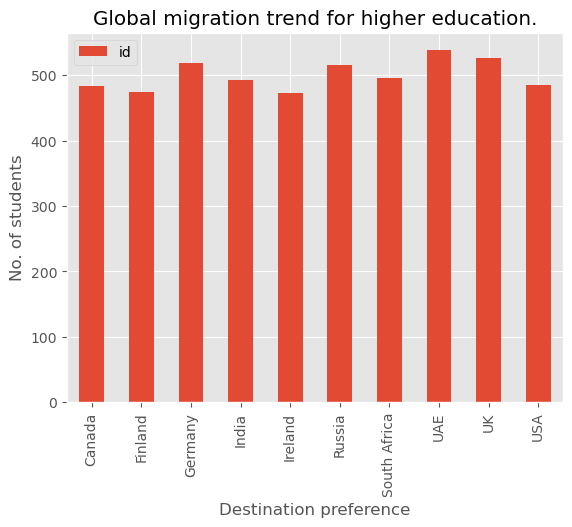

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

df_dest.plot(kind='bar')
plt.title("Global migration trend for higher education.")
plt.xlabel('Destination preference')
plt.ylabel('No. of students')
plt.show()
          

# As per the data more people are preferring the following countries:UAE,UK,Germany,Russia 

## Migration trend to USA.

In [34]:
df1=df[df['destination_country'] == 'USA']
df1=df1.groupby('year_of_enrollment').agg({'id':'sum'})
df1

,id
year_of_enrollment,
2019,80
2020,100
2021,105
2022,102
2023,98


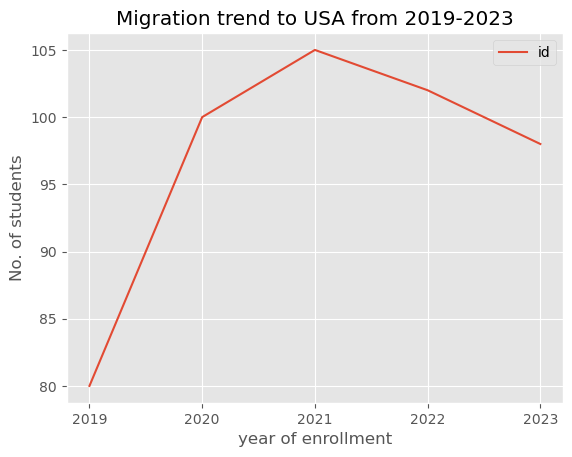

In [39]:
import matplotlib.ticker as ticker
ax=df1.plot(kind='line')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Migration trend to USA from 2019-2023')
plt.xlabel('year of enrollment')
plt.ylabel('No. of students')
plt.show()


In [ ]:
# This shows that students enrolling in USA was maximum in 2021 but is now declining.

## Migration trend in Canada

In [41]:
df2=df[df['destination_country'] == 'Canada']
df2=df2.groupby('year_of_enrollment').agg({'id':'sum'})
df2

,id
year_of_enrollment,
2019,91
2020,90
2021,105
2022,94
2023,103


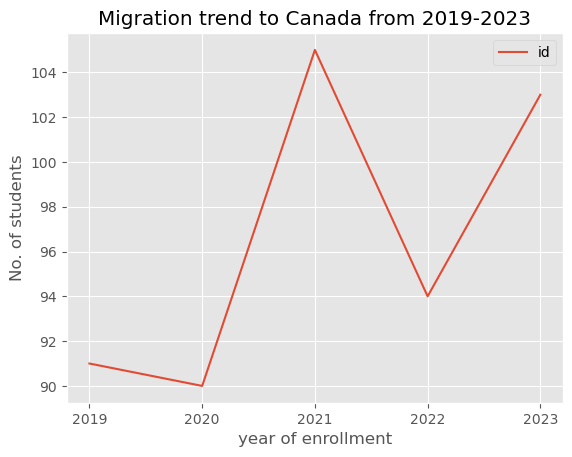

In [42]:
import matplotlib.ticker as ticker
ax=df2.plot(kind='line')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Migration trend to Canada from 2019-2023')
plt.xlabel('year of enrollment')
plt.ylabel('No. of students')
plt.show()


In [45]:
df2['USA_students']=df1['id']
df2

,id,USA_students
year_of_enrollment,,
2019,91,80
2020,90,100
2021,105,105
2022,94,102
2023,103,98


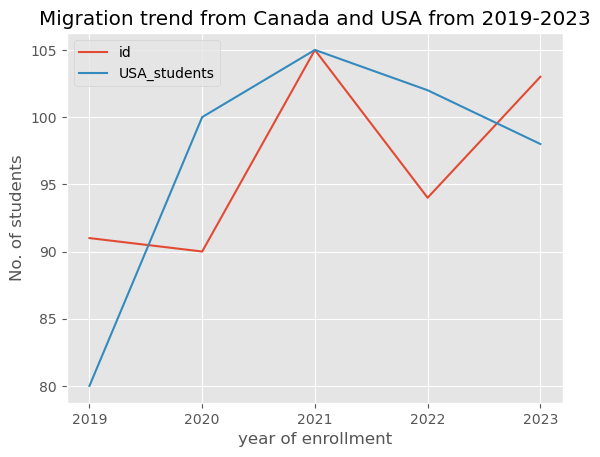

In [46]:
ax=df2.plot(kind='line')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Migration trend from Canada and USA from 2019-2023')
plt.xlabel('year of enrollment')
plt.ylabel('No. of students')
plt.show()

In [47]:
df_UAE=df[df['destination_country'] == 'UAE']
df_UAE=df_UAE.groupby('year_of_enrollment').agg({'id':'sum'})
df_UAE

,id
year_of_enrollment,
2019,117
2020,100
2021,92
2022,111
2023,118


In [48]:
df2['UAE_students']=df_UAE['id']

In [49]:
df_UK=df[df['destination_country'] == 'UK']
df_UK=df_UK.groupby('year_of_enrollment').agg({'id':'sum'})
df_UK

,id
year_of_enrollment,
2019,100
2020,107
2021,106
2022,109
2023,104


In [50]:
df2['UK_students']=df_UK['id']

In [51]:
df_Russia=df[df['destination_country'] == 'Russia']
df_Russia=df_Russia.groupby('year_of_enrollment').agg({'id':'sum'})
df_Russia

,id
year_of_enrollment,
2019,107
2020,93
2021,99
2022,103
2023,113


In [52]:
df2['Russia_students']=df_Russia['id']

In [53]:
df_Germany=df[df['destination_country'] == 'Germany']
df_Germany=df_Germany.groupby('year_of_enrollment').agg({'id':'sum'})
df_Germany

,id
year_of_enrollment,
2019,106
2020,105
2021,101
2022,104
2023,102


In [55]:
df2['Germany_students']=df_Germany['id']

## 

In [64]:
df2.rename(columns={'id': 'Canada_students'},inplace=True)

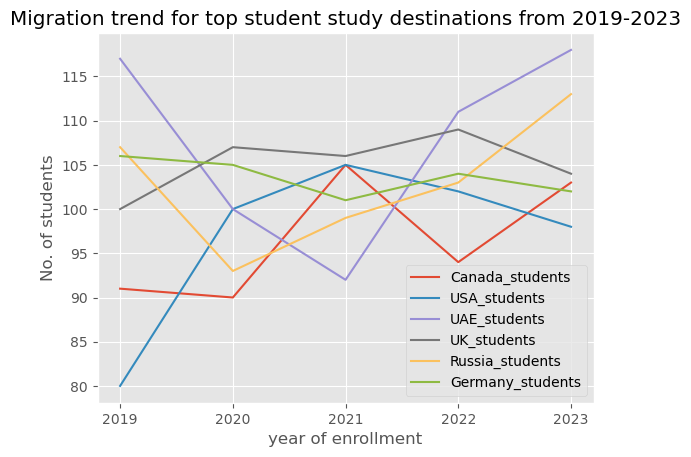

In [65]:
ax=df2.plot(kind='line')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Migration trend for top student study destinations from 2019-2023')
plt.xlabel('year of enrollment')
plt.ylabel('No. of students')
plt.show()

In [ ]:
#UAE is emerging as the most preferred student destination in 2023 ,followed by Russia,UK ,Canada,Germany and then USA.


## What are the most popular courses studied abroad?

In [67]:
df_course=df.groupby('course_name').agg({'id': 'sum'})
df_course

,id
course_name,
Architecture,335
Biotechnology,302
Business Administration,321
Civil Engineering,335
Computer Science,330
Data Science,369
Design,345
Economics,311
Electrical Engineering,339


<Axes: xlabel='course_name'>

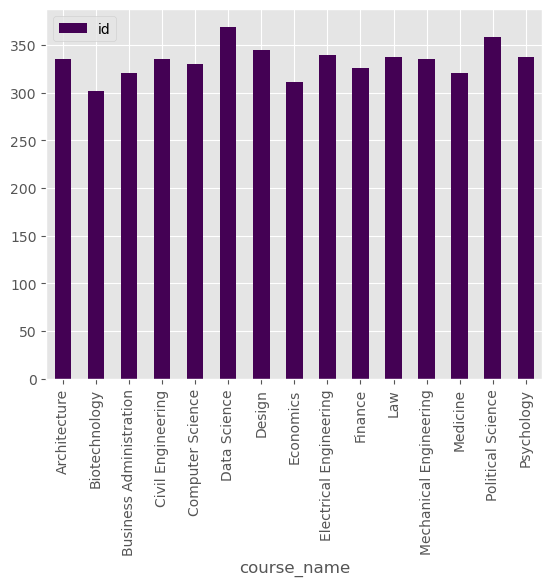

In [77]:
import matplotlib.cm as cm
colors = cm.viridis(np.linspace(0, 1, len(df))) # Generate colors based on number of bars
df_course.plot(kind='bar', color=colors)

In [79]:
df_course.sort_values(by='id',ascending=False)

,id
course_name,
Data Science,369
Political Science,358
Design,345
Electrical Engineering,339
Law,337
Psychology,337
Architecture,335
Civil Engineering,335
Mechanical Engineering,335


In [119]:
#Data science seems to be the top choice.

In [81]:
df_DS=df[df['course_name'] == 'Data Science']
df_DS_dest=df_DS.groupby('destination_country').agg({'id': 'sum'})
df_DS_dest.sort_values(by='id',ascending=False)

,id
destination_country,
UAE,46
Finland,44
Germany,41
USA,41
UK,37
Canada,34
India,34
Russia,33
Ireland,31


In [120]:
#UAE comes out to be the top choice for Data Science degree by the students. 
#Comparing the placements in Data science in the top 4 study destinations for DS i.e. UAE,Finland,Germany and USA.

## Comparing placements in top destinations for Data Science.

In [96]:
df_DS_UAE=df[(df['course_name'] == 'Data Science') & (df['destination_country']== 'UAE')]
df_DS_UAE_placement=df_DS_UAE.groupby('placement_status').agg({'id': 'sum'})
df_DS_UAE_placement.rename(columns={'id': 'UAE'},inplace=True)


In [97]:
df_DS_Finland=df[(df['course_name'] == 'Data Science') & (df['destination_country']== 'Finland')]
df_DS_Finland_placement=df_DS_Finland.groupby('placement_status').agg({'id': 'sum'})
df_DS_Finland_placement
df_DS_UAE_placement['Finland']=df_DS_Finland_placement['id']
df_DS_UAE_placement

,UAE,Finland
placement_status,,
Not Placed,24,17
Placed,22,27


In [98]:
df_DS_Germany=df[(df['course_name'] == 'Data Science') & (df['destination_country']== 'Germany')]
df_DS_Germany_placement=df_DS_Germany.groupby('placement_status').agg({'id': 'sum'})
df_DS_UAE_placement['Germany']=df_DS_Germany_placement['id']
df_DS_UAE_placement

,UAE,Finland,Germany
placement_status,,,
Not Placed,24,17,24
Placed,22,27,17


In [99]:
df_DS_USA=df[(df['course_name'] == 'Data Science') & (df['destination_country']== 'USA')]
df_DS_USA_placement=df_DS_USA.groupby('placement_status').agg({'id': 'sum'})
df_DS_UAE_placement['USA']=df_DS_USA_placement['id']
df_DS_UAE_placement

,UAE,Finland,Germany,USA
placement_status,,,,
Not Placed,24,17,24,20
Placed,22,27,17,21


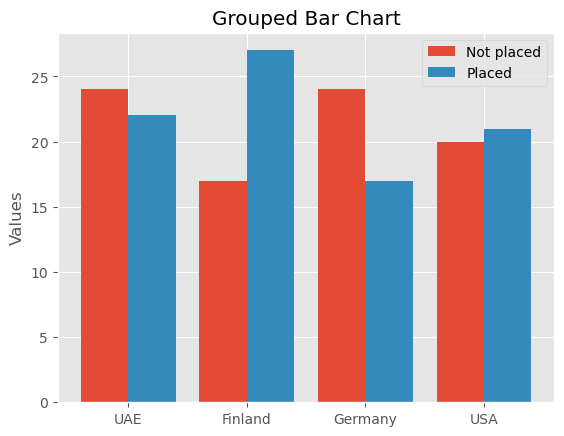

In [105]:

import numpy as np
import matplotlib.pyplot as plt

countries = ['UAE', 'Finland', 'Germany', 'USA']
v1, v2 = df_DS_UAE_placement.iloc[0,:], df_DS_UAE_placement.iloc[1,:]
w, x = 0.4, np.arange(len(countries))

plt.bar(x - w/2, v1, w, label='Not placed')
plt.bar(x + w/2, v2, w, label='Placed')

plt.xticks(x, countries)
plt.ylabel('Values')
plt.title('Grouped Bar Chart')
plt.legend()
plt.show()

In [109]:
placement_perct=(v2/(v1+v2))*100

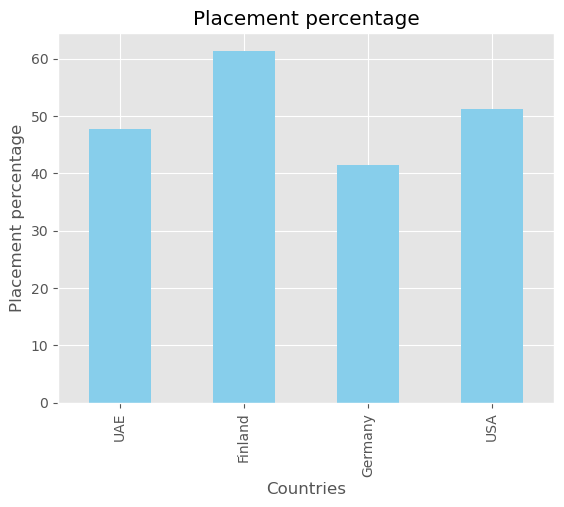

In [113]:
placement_perct.plot(kind='bar',color='skyblue')
plt.title('Placement percentage')
plt.xlabel('Countries')
plt.ylabel('Placement percentage')
plt.show()

In [121]:
#Finland has the highest percentage placement and Germany has the lowest among all the 4 countries.

## Salaries earned by Data scientists in different countries

In [114]:
# Comparing the salaries earned by data scientists in the above countries.

In [116]:
df3=df[(df['course_name'] == 'Data Science')]

In [118]:
df_s=df3.groupby('destination_country').agg({'id': 'sum', 'starting_salary_usd': 'mean'})
df_s.sort_values('starting_salary_usd',ascending=False)

,id,starting_salary_usd
destination_country,,
Finland,44,60052.795455
India,34,57526.058824
South Africa,28,53572.107143
Russia,33,52875.666667
Canada,34,52373.823529
USA,41,49921.682927
UAE,46,47112.260870
UK,37,42831.351351
Ireland,31,35569.580645


In [ ]:
#This list shows highest starting salaries for data science is offered in Finland .